In [1]:
# !pip install tensorflow

In [2]:
# !pip install keras

In [3]:
# import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

from keras import Input

from keras.datasets import cifar10

import numpy as np

In [4]:
from matplotlib import pyplot as plt

In [5]:
input_img = Input(shape=(32, 32, 3))

In [6]:
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

In [7]:
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

In [8]:
conv_autoencoder = Model(input_img, decoded)
conv_autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

hnew = (h-k+2p) / stride = (32-3+2/1) = 31

In [9]:
shape_ord = (32, 32, 3)

(x_train, _), (x_test, _) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = np.reshape(x_train, ((x_train.shape[0],) + shape_ord))
x_test = np.reshape(x_test, ((x_test.shape[0],) + shape_ord))

170498071/170498071 [==============================] - 13s 0us/step


In [10]:
from keras import backend as K
from keras.callbacks import TensorBoard

In [11]:
conv_autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 8)           584   

In [12]:
batch_size=128
steps_per_epoch = int(np.floor(x_train.shape[0] / batch_size))
conv_autoencoder.fit(x_train, x_train, epochs=50, batch_size=128,
                     shuffle=True, validation_data=(x_test, x_test),
                     callbacks=[TensorBoard(log_dir='./tf_autoencoder_logs')])

Epoch 1/50
391/391 [==============================] - 10s 11ms/step - loss: 0.6932 - val_loss: 0.6932
Epoch 2/50
391/391 [==============================] - 3s 9ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 3/50
391/391 [==============================] - 3s 9ms/step - loss: 0.6931 - val_loss: 0.6931
Epoch 4/50
391/391 [==============================] - 3s 7ms/step - loss: 0.6931 - val_loss: 0.6931
Epoch 5/50
391/391 [==============================] - 3s 7ms/step - loss: 0.6930 - val_loss: 0.6930
Epoch 6/50
391/391 [==============================] - 3s 7ms/step - loss: 0.6930 - val_loss: 0.6930
Epoch 7/50
391/391 [==============================] - 4s 9ms/step - loss: 0.6929 - val_loss: 0.6929
Epoch 8/50
391/391 [==============================] - 3s 7ms/step - loss: 0.6929 - val_loss: 0.6929
Epoch 9/50
391/391 [==============================] - 3s 8ms/step - loss: 0.6928 - val_loss: 0.6928
Epoch 10/50
391/391 [==============================] - 3s 8ms/step - loss: 0.6928 - val_loss: 0.69

313/313 [==============================] - 1s 2ms/step


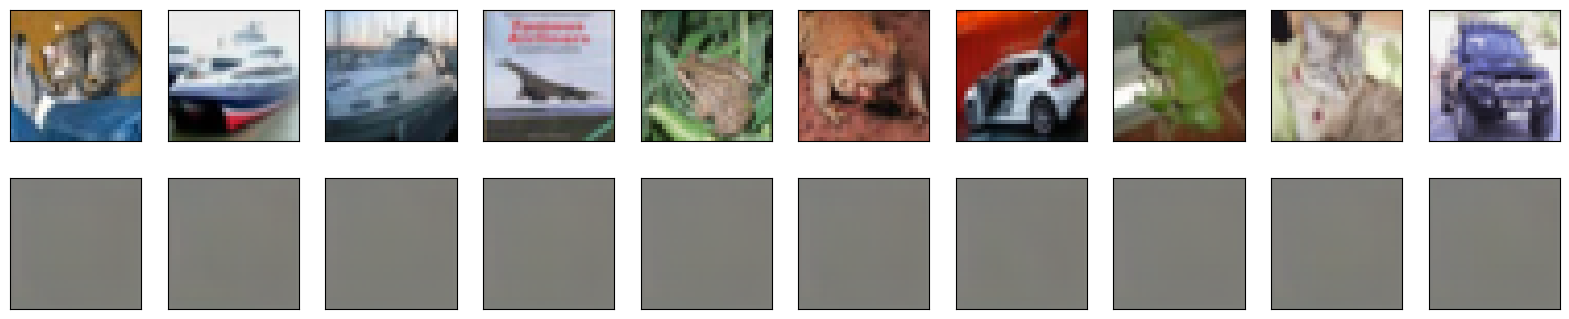

In [13]:
decoded_imgs = conv_autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

313/313 [==============================] - 1s 3ms/step


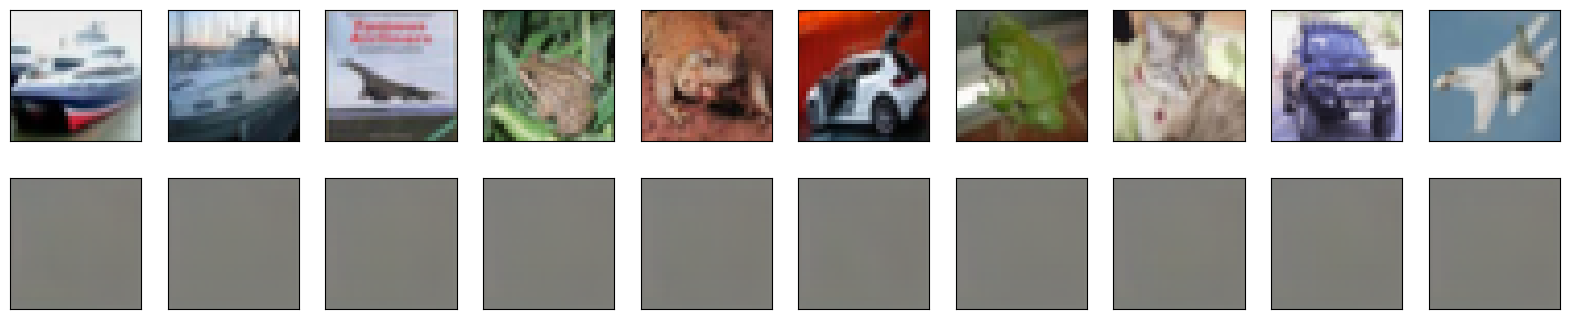

In [14]:
decoded_imgs = conv_autoencoder.predict(x_test)

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()